In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sms
import statsmodels.formula.api as statsmodels
import pylab

from scipy.stats import zscore
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import StandardScaler

In [2]:
F=pd.read_csv('results.csv')

In [3]:
F.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
F.shape

(40839, 9)

In [5]:
for i in range(0,len(F['date'])):
    F.loc[i,'year']=F.loc[i,'date'][:4]

In [6]:
F.drop('date', axis=1, inplace=True)

In [7]:
for i in range (0,len(F['home_score'])):
    if F['home_score'][i]>F['away_score'][i]:
        F.loc[i,'result']=F['home_team'][i]
    elif F['home_score'][i]==F['away_score'][i]:
        F.loc[i,'result']='Tie'
    else:
        F.loc[i,'result']=F['away_team'][i]

In [8]:
F['year']=pd.to_numeric(F['year'])

In [9]:
for i in range(0,len(F['year'])):
    if (F['year'][i]>=1800) and (F['year'][i]<1900):
        F.loc[i,'era']="80's"
    elif (F['year'][i]>=1900) and (F['year'][i]<2000):
        F.loc[i,'era']="90's"
    elif (F['year'][i]>=2000) and (F['year'][i]<2100):
        F.loc[i,'era']="20's"

#### Tournaments

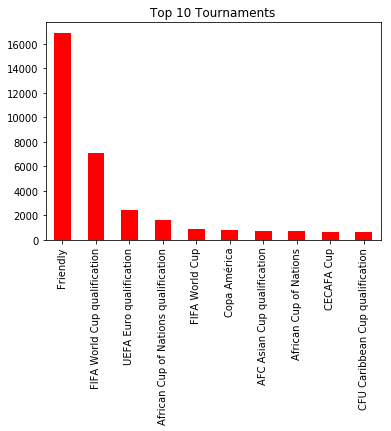

In [10]:
F['tournament'].value_counts().head(10).plot(kind='bar', color='red')
plt.title('Top 10 Tournaments')
plt.show()

In [11]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's


In [12]:
E8=F[F['era']=="80's"]['tournament']

In [13]:
E9=F[F['era']=="90's"]['tournament']

In [14]:
E2=F[F['era']=="20's"]['tournament']

In [15]:
T8=pd.DataFrame(E8.value_counts()).reset_index()
T8.rename({'tournament':"Total 80's"}, axis=1, inplace=True)
T8.rename({'index':'Tournament'}, axis=1, inplace=True)

In [16]:
T9=pd.DataFrame(E9.value_counts()).reset_index()
T9.rename({'tournament':"Total 90's"}, axis=1, inplace=True)
T9.rename({'index':'Tournament'}, axis=1, inplace=True)

In [17]:
T2=pd.DataFrame(E2.value_counts()).reset_index()
T2.rename({'tournament':"Total 20's"}, axis=1, inplace=True)
T2.rename({'index':'Tournament'}, axis=1, inplace=True)

In [18]:
T8=T8.merge(T9, on='Tournament', how='outer')

In [19]:
T8=T8.merge(T2, on='Tournament', how='outer')

In [20]:
T8.fillna(0, inplace=True)

In [21]:
T8["Total 80's"]=T8["Total 80's"].astype(int)
T8["Total 90's"]=T8["Total 90's"].astype(int)
T8["Total 20's"]=T8["Total 20's"].astype(int)

In [22]:
T8['Total']=T8[["Total 80's","Total 90's","Total 20's"]].sum(1)

In [23]:
T8.head()

,Tournament,Total 80's,Total 90's,Total 20's,Total
0,British Championship,94,407,0,501
1,Friendly,32,10127,6752,16911
2,FIFA World Cup qualification,0,3114,3986,7100
3,UEFA Euro qualification,0,1300,1132,2432
4,African Cup of Nations qualification,0,761,855,1616


In [24]:
C1=T8[['Tournament',"Total 80's"]].sort_values(by="Total 80's", ascending=False).head(2)

In [25]:
C2=T8[['Tournament',"Total 90's"]].sort_values(by="Total 90's", ascending=False).head()

In [26]:
C3=T8[['Tournament',"Total 20's"]].sort_values(by="Total 20's", ascending=False).head()

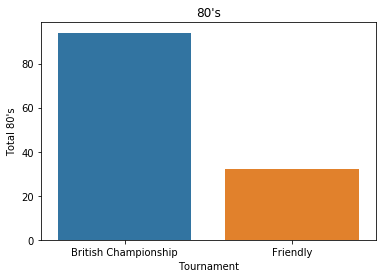

In [27]:
sns.barplot(C1['Tournament'],C1["Total 80's"])
plt.title("80's")
plt.show()

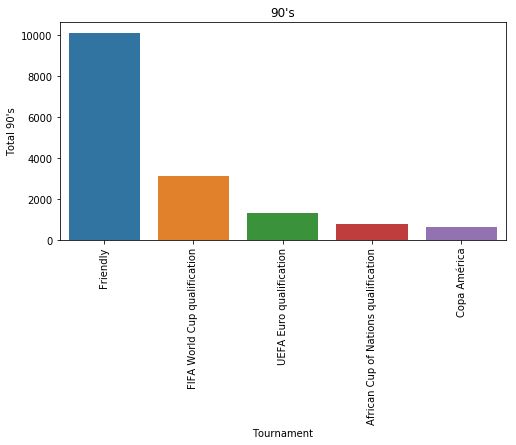

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(C2['Tournament'],C2["Total 90's"])
plt.xticks(rotation=90)
plt.title("90's")
plt.show()

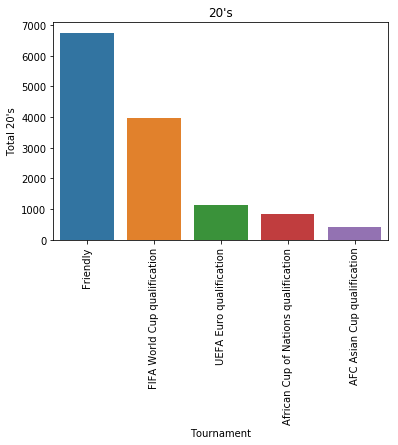

In [29]:
sns.barplot(C3['Tournament'],C3["Total 20's"])
plt.xticks(rotation=90)
plt.title("20's")
plt.show()

In [32]:
T8.to_excel('Tournament_Total.xlsx')

#### Percentage Table

In [33]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's


In [34]:
ND=F[F['neutral']==False]

In [35]:
ND1=F[F['neutral']==True]

In [36]:
ND.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's


In [37]:
ND1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
68,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,1890,Wales,80's
262,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,1910,Uruguay,90's
326,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1912,Norway,90's
428,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,Uruguay,90's
431,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916,Tie,90's


In [38]:
VC=pd.DataFrame(ND['home_team'].value_counts()).reset_index()

In [39]:
VC1=pd.DataFrame(ND['away_team'].value_counts()).reset_index()

In [40]:
VC2=pd.DataFrame(ND1['home_team'].value_counts()).reset_index()

In [41]:
VC3=pd.DataFrame(ND1['away_team'].value_counts()).reset_index()

In [42]:
VC2.rename({'index':'country'}, axis=1, inplace=True)
VC3.rename({'index':'country'}, axis=1, inplace=True)

In [44]:
VC2=VC2.merge(VC3, on='country', how='outer')

In [45]:
VC2.fillna(0, inplace=True)

In [46]:
VC2['home_team']=VC2['home_team'].astype(int)
VC2['away_team']=VC2['away_team'].astype(int)

In [48]:
for i in range(0, len(VC2['country'])):
    VC2.loc[i,'neutral']=VC2['home_team'][i]+VC2['away_team'][i]

In [49]:
VC2['neutral']=VC2['neutral'].astype(int)

In [50]:
VC2.drop(['home_team', 'away_team'], axis=1, inplace=True )

In [51]:
VC2.head()

,country,neutral
0,Mexico,376
1,Brazil,325
2,Argentina,264
3,Iraq,281
4,South Korea,353


In [52]:
VC.rename({'index':'country'}, axis=1, inplace=True)
VC1.rename({'index':'country'}, axis=1, inplace=True)

In [53]:
VC=VC.merge(VC1, on='country', how='outer')

In [54]:
VC.isnull().sum()

country       0
home_team    36
away_team     7
dtype: int64

In [55]:
VC.fillna(0,inplace=True)

In [56]:
VC['home_team']=VC['home_team'].astype(int)
VC['away_team']=VC['away_team'].astype(int)

In [57]:
VC=VC.merge(VC2, on='country', how='outer')

In [58]:
VC.isnull().sum()

country       0
home_team    10
away_team    10
neutral      20
dtype: int64

In [59]:
VC.fillna(0, inplace=True)

In [60]:
for i in range(0,len(VC['country'])):
    VC.loc[i,'total']=VC['home_team'][i]+VC['away_team'][i]+VC['neutral'][i]

In [61]:
VC.head()

,country,home_team,away_team,neutral,total
0,Sweden,446.0,459.0,105.0,1010.0
1,England,437.0,450.0,107.0,994.0
2,France,428.0,312.0,94.0,834.0
3,Hungary,418.0,441.0,63.0,922.0
4,Germany,410.0,382.0,150.0,942.0


In [62]:
VC.isnull().sum()

country      0
home_team    0
away_team    0
neutral      0
total        0
dtype: int64

In [63]:
L1=list(VC.columns)[1:]

In [64]:
for i in L1:
    VC[i]=VC[i].astype(int)

In [65]:
A=VC

In [66]:
A.head()

,country,home_team,away_team,neutral,total
0,Sweden,446,459,105,1010
1,England,437,450,107,994
2,France,428,312,94,834
3,Hungary,418,441,63,922
4,Germany,410,382,150,942


In [67]:
MP=A[['total','country']].sort_values(by='total',ascending=False).head()

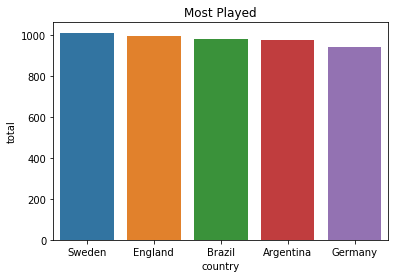

In [68]:
sns.barplot(MP['country'], MP['total'])
plt.title('Most Played')
plt.show()

In [69]:
LP=A[['total','country']].sort_values(by='total',ascending=False).tail()

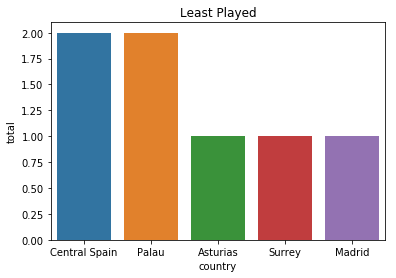

In [70]:
sns.barplot(LP['country'],LP['total'])
plt.title('Least Played')
plt.show()

In [71]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's


In [72]:
R=pd.DataFrame(F['result'].value_counts()).reset_index()[1:]

In [73]:
R.rename({'index':'country'}, axis=1, inplace=True)

In [74]:
A=A.merge(R, on='country', how='outer')

In [75]:
A['result'].fillna(0, inplace=True)

In [76]:
A['result']=A['result'].astype(int)

In [77]:
A.rename({'result':'total_wins'}, axis=1, inplace=True)

In [78]:
A.head()

,country,home_team,away_team,neutral,total,total_wins
0,Sweden,446,459,105,1010,494
1,England,437,450,107,994,563
2,France,428,312,94,834,412
3,Hungary,418,441,63,922,433
4,Germany,410,382,150,942,551


In [79]:
for i in range(0,len(A['country'])):
    A.loc[i,'total_winning%']=round((A['total_wins'][i]/A['total'][i])*100,1)

In [80]:
A.head()

,country,home_team,away_team,neutral,total,total_wins,total_winning%
0,Sweden,446,459,105,1010,494,48.9
1,England,437,450,107,994,563,56.6
2,France,428,312,94,834,412,49.4
3,Hungary,418,441,63,922,433,47.0
4,Germany,410,382,150,942,551,58.5


In [86]:
WW=A[A['total']>190][['country','total_winning%']].sort_values(by='total_winning%', ascending=False).head(10)

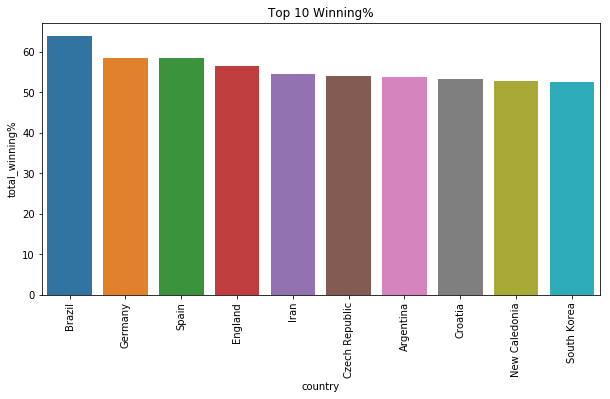

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(WW['country'], WW['total_winning%'])
plt.xticks(rotation=90)
plt.title('Top 10 Winning%')
plt.show()

In [88]:
ND.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's


In [89]:
ND1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
68,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,1890,Wales,80's
262,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,1910,Uruguay,90's
326,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1912,Norway,90's
428,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,Uruguay,90's
431,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916,Tie,90's


In [90]:
INDEX=list(ND.index)

In [91]:
INDEX1=list(ND1.index)

In [92]:
for i in INDEX:
    if ND.loc[i,'home_team']==ND.loc[i,'result']:
        F.loc[i,'home_win']=F['home_team'][i]
    elif ND.loc[i,'away_team']==ND.loc[i,'result']:
        F.loc[i,'away_win']=F['away_team'][i]
    else:
        F.loc[i,'home_win']='Tie'
        F.loc[i,'away_win']='Tie'

In [93]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era,home_win,away_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's,Tie,Tie
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's,England,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's,Scotland,NaN
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's,Tie,Tie
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's,Scotland,NaN


In [94]:
ND1.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era
68,Wales,Northern Ireland,5,2,British Championship,Shrewsbury,England,True,1890,Wales,80's
262,Chile,Uruguay,0,3,Friendly,Buenos Aires,Argentina,True,1910,Uruguay,90's
326,Norway,Russia,2,1,Friendly,Stockholm,Sweden,True,1912,Norway,90's
428,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,1916,Uruguay,90's
431,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,1916,Tie,90's


In [95]:
for i in INDEX1:
    if ND1.loc[i,'home_team']==ND1.loc[i,'result']:
        F.loc[i,'neutral_win']=F['home_team'][i]
    elif ND1.loc[i,'away_team']==ND1.loc[i,'result']:
        F.loc[i,'neutral_win']=F['away_team'][i]
    elif ND1.loc[i,'result']=='Tie':
        F.loc[i,'neutral_win']='Tie'

In [96]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era,home_win,away_win,neutral_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's,Tie,Tie,NaN
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's,England,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's,Scotland,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's,Tie,Tie,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's,Scotland,NaN,NaN


In [97]:
HW=pd.DataFrame(F['home_win'].value_counts()).reset_index()[1:]

In [98]:
HW.head()

,index,home_win
1,England,280
2,Sweden,266
3,Germany,260
4,France,250
5,Brazil,244


In [99]:
HW.rename({'index':'country'}, axis=1, inplace=True)

In [100]:
A=A.merge(HW, on='country', how='outer')

In [101]:
A.fillna(0, inplace=True)

In [102]:
AW=pd.DataFrame(F['away_win'].value_counts()).reset_index()[1:]

In [103]:
AW.rename({'index':'country'}, axis=1, inplace=True)

In [104]:
AW.head()

,country,away_win
1,England,242
2,Germany,207
3,Sweden,189
4,Hungary,164
5,Brazil,163


In [105]:
A=A.merge(AW, on='country', how='outer')

In [106]:
A.fillna(0,inplace=True)

In [107]:
NW=pd.DataFrame(F['neutral_win'].value_counts()).reset_index()[1:]

In [108]:
NW.rename({'index':'country'}, axis=1, inplace=True)

In [109]:
A=A.merge(NW, on='country', how='outer')

In [110]:
A.fillna(0, inplace=True)

In [111]:
A['neutral_win']=A['neutral_win'].astype(int)

In [112]:
A['away_win']=A['away_win'].astype(int)

In [113]:
A['home_win']=A['home_win'].astype(int)

In [114]:
A.head()

,country,home_team,away_team,neutral,total,total_wins,total_winning%,home_win,away_win,neutral_win
0,Sweden,446,459,105,1010,494,48.9,266,189,39
1,England,437,450,107,994,563,56.6,280,242,41
2,France,428,312,94,834,412,49.4,250,116,46
3,Hungary,418,441,63,922,433,47.0,240,164,29
4,Germany,410,382,150,942,551,58.5,260,207,84


In [115]:
for i in range(0,len(A['country'])):
    A.loc[i,'home_winning%']=round((A['home_win'][i]/A['home_team'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [116]:
for i in range(0,len(A['country'])):
    A.loc[i,'away_winning%']=round((A['away_win'][i]/A['away_team'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [117]:
for i in range(0,len(A['country'])):
    A.loc[i,'neutral_winning%']=round((A['neutral_win'][i]/A['neutral'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [118]:
A.head()

,country,home_team,away_team,neutral,total,total_wins,total_winning%,home_win,away_win,neutral_win,home_winning%,away_winning%,neutral_winning%
0,Sweden,446,459,105,1010,494,48.9,266,189,39,59.6,41.2,37.1
1,England,437,450,107,994,563,56.6,280,242,41,64.1,53.8,38.3
2,France,428,312,94,834,412,49.4,250,116,46,58.4,37.2,48.9
3,Hungary,418,441,63,922,433,47.0,240,164,29,57.4,37.2,46.0
4,Germany,410,382,150,942,551,58.5,260,207,84,63.4,54.2,56.0


In [119]:
A.rename({'neutral':'neutral_team'}, axis=1, inplace=True)

In [120]:
QQ=A[A['total']>190][['country','home_winning%']].sort_values(by='home_winning%', ascending=False).head(10)

In [121]:
QQ1=A[A['total']>190][['country', 'away_winning%']].sort_values(by='away_winning%', ascending=False).head(10)

In [122]:
QQ2=A[A['total']>190][['country','neutral_winning%']].sort_values(by='neutral_winning%', ascending=False).head(10)

In [127]:
WW

,country,total_winning%
15,Brazil,64.0
4,Germany,58.5
18,Spain,58.4
1,England,56.6
63,Iran,54.5
108,Czech Republic,54.0
16,Argentina,53.7
100,Croatia,53.2
145,New Caledonia,52.9
20,South Korea,52.6


In [123]:
QQ

,country,home_winning%
15,Brazil,72.8
174,North Korea,70.0
18,Spain,70.0
63,Iran,68.8
62,Ivory Coast,68.8
108,Czech Republic,68.1
100,Croatia,67.5
69,Nigeria,66.9
70,Ghana,66.5
12,Italy,66.5


In [124]:
QQ1

,country,away_winning%
4,Germany,54.2
1,England,53.8
15,Brazil,51.4
18,Spain,46.0
63,Iran,45.9
20,South Korea,45.0
108,Czech Republic,43.7
40,Russia,42.5
100,Croatia,42.3
11,Netherlands,41.4


In [125]:
QQ2

,country,neutral_winning%
15,Brazil,67.1
187,Tahiti,60.5
16,Argentina,60.2
145,New Caledonia,58.7
18,Spain,57.5
66,Yugoslavia,56.9
40,Russia,56.5
4,Germany,56.0
24,Portugal,55.3
136,Fiji,55.1


In [126]:
A.head()

,country,home_team,away_team,neutral_team,total,total_wins,total_winning%,home_win,away_win,neutral_win,home_winning%,away_winning%,neutral_winning%
0,Sweden,446,459,105,1010,494,48.9,266,189,39,59.6,41.2,37.1
1,England,437,450,107,994,563,56.6,280,242,41,64.1,53.8,38.3
2,France,428,312,94,834,412,49.4,250,116,46,58.4,37.2,48.9
3,Hungary,418,441,63,922,433,47.0,240,164,29,57.4,37.2,46.0
4,Germany,410,382,150,942,551,58.5,260,207,84,63.4,54.2,56.0


In [128]:
F.head()

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,result,era,home_win,away_win,neutral_win
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,Tie,80's,Tie,Tie,NaN
1,England,Scotland,4,2,Friendly,London,England,False,1873,England,80's,England,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,Scotland,80's,Scotland,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,1875,Tie,80's,Tie,Tie,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,Scotland,80's,Scotland,NaN,NaN


In [129]:
for i in range(0,len(A['country'])):
    A.loc[i,'home_loss']=A['home_team'][i]-A['home_win'][i]

In [130]:
for i in range(0,len(A['country'])):
    A.loc[i,'away_loss']=A['away_team'][i]-A['away_win'][i]

In [131]:
for i in range(0,len(A['country'])):
    A.loc[i,'neutral_loss']=A['neutral_team'][i]-A['neutral_win'][i]

In [132]:
A.head()

,country,home_team,away_team,neutral_team,total,total_wins,total_winning%,home_win,away_win,neutral_win,home_winning%,away_winning%,neutral_winning%,home_loss,away_loss,neutral_loss
0,Sweden,446,459,105,1010,494,48.9,266,189,39,59.6,41.2,37.1,180.0,270.0,66.0
1,England,437,450,107,994,563,56.6,280,242,41,64.1,53.8,38.3,157.0,208.0,66.0
2,France,428,312,94,834,412,49.4,250,116,46,58.4,37.2,48.9,178.0,196.0,48.0
3,Hungary,418,441,63,922,433,47.0,240,164,29,57.4,37.2,46.0,178.0,277.0,34.0
4,Germany,410,382,150,942,551,58.5,260,207,84,63.4,54.2,56.0,150.0,175.0,66.0


In [134]:
A.fillna(0, inplace=True)

In [135]:
LL2=list(A.columns)[-3:]

In [136]:
for i in LL2:
    A[i]=A[i].astype(int)

In [137]:
for i in range(0,len(A['country'])):
    A.loc[i,'home_lossing%']=round((A['home_loss'][i]/A['home_team'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [138]:
for i in range(0,len(A['country'])):
    A.loc[i,'away_lossing%']=round((A['away_loss'][i]/A['away_team'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [139]:
for i in range(0,len(A['country'])):
    A.loc[i,'neutral_lossing%']=round((A['neutral_loss'][i]/A['neutral_team'][i])*100,1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in long_scalars
  


In [140]:
A.head()

,country,home_team,away_team,neutral_team,total,total_wins,total_winning%,home_win,away_win,neutral_win,home_winning%,away_winning%,neutral_winning%,home_loss,away_loss,neutral_loss,home_lossing%,away_lossing%,neutral_lossing%
0,Sweden,446,459,105,1010,494,48.9,266,189,39,59.6,41.2,37.1,180,270,66,40.4,58.8,62.9
1,England,437,450,107,994,563,56.6,280,242,41,64.1,53.8,38.3,157,208,66,35.9,46.2,61.7
2,France,428,312,94,834,412,49.4,250,116,46,58.4,37.2,48.9,178,196,48,41.6,62.8,51.1
3,Hungary,418,441,63,922,433,47.0,240,164,29,57.4,37.2,46.0,178,277,34,42.6,62.8,54.0
4,Germany,410,382,150,942,551,58.5,260,207,84,63.4,54.2,56.0,150,175,66,36.6,45.8,44.0


In [141]:
A['total_lossing%']=100-A['total_winning%']

In [163]:
A.rename({'home_lossing%':'home_losing%'}, axis=1, inplace=True)
A.rename({'away_lossing%':'away_losing%'}, axis=1, inplace=True)
A.rename({'neutral_lossing%':'neutral_losing%'}, axis=1, inplace=True)
A.rename({'total_lossing%':'total_losing%'}, axis=1, inplace=True)

In [164]:
A[['country','home_losing%','away_losing%','neutral_losing%','total_losing%']].head()

,country,home_losing%,away_losing%,neutral_losing%,total_losing%
0,Sweden,40.4,58.8,62.9,51.1
1,England,35.9,46.2,61.7,43.4
2,France,41.6,62.8,51.1,50.6
3,Hungary,42.6,62.8,54.0,53.0
4,Germany,36.6,45.8,44.0,41.5


In [153]:
A.fillna(0,inplace=True)

In [166]:
T1=A[A['total']>190]

In [167]:
T1=T1[['country','total_winning%','total_losing%','home_winning%','home_losing%','away_winning%','away_losing%','neutral_winning%','neutral_losing%']]

In [168]:
T1.head()

,country,total_winning%,total_losing%,home_winning%,home_losing%,away_winning%,away_losing%,neutral_winning%,neutral_losing%
0,Sweden,48.9,51.1,59.6,40.4,41.2,58.8,37.1,62.9
1,England,56.6,43.4,64.1,35.9,53.8,46.2,38.3,61.7
2,France,49.4,50.6,58.4,41.6,37.2,62.8,48.9,51.1
3,Hungary,47.0,53.0,57.4,42.6,37.2,62.8,46.0,54.0
4,Germany,58.5,41.5,63.4,36.6,54.2,45.8,56.0,44.0


In [169]:
T1[['country','total_losing%']].sort_values(by='total_losing%', ascending=False).head(5)

,country,total_losing%
126,Liechtenstein,92.2
49,Luxembourg,91.4
53,Malta,88.0
150,Mauritania,82.8
123,Faroe Islands,82.1


In [170]:
T1[['country','home_losing%']].sort_values(by='home_losing%', ascending=False).head(5)

,country,home_losing%
126,Liechtenstein,88.8
49,Luxembourg,88.5
53,Malta,84.8
190,Zanzibar,82.8
123,Faroe Islands,79.8


In [171]:
T1[['country','away_losing%']].sort_values(by='away_losing%', ascending=False).head(5)

,country,away_losing%
49,Luxembourg,95.8
126,Liechtenstein,95.7
139,Niger,95.4
168,Sri Lanka,94.9
157,Cambodia,94.8


In [172]:
T1[['country','neutral_losing%']].sort_values(by='neutral_losing%', ascending=False).head(5)

,country,neutral_losing%
150,Mauritania,92.2
78,Bolivia,91.9
126,Liechtenstein,90.0
118,Benin,84.6
161,Bangladesh,83.5


In [173]:
T1.head()

,country,total_winning%,total_losing%,home_winning%,home_losing%,away_winning%,away_losing%,neutral_winning%,neutral_losing%
0,Sweden,48.9,51.1,59.6,40.4,41.2,58.8,37.1,62.9
1,England,56.6,43.4,64.1,35.9,53.8,46.2,38.3,61.7
2,France,49.4,50.6,58.4,41.6,37.2,62.8,48.9,51.1
3,Hungary,47.0,53.0,57.4,42.6,37.2,62.8,46.0,54.0
4,Germany,58.5,41.5,63.4,36.6,54.2,45.8,56.0,44.0


In [176]:
T1.sort_values(by=['total_winning%','total_losing%','home_winning%','away_winning%','neutral_winning%','home_losing%','away_losing%','neutral_losing%'], 
               ascending=[False,True,False,False,False,True,True,True]).head()

,country,total_winning%,total_losing%,home_winning%,home_losing%,away_winning%,away_losing%,neutral_winning%,neutral_losing%
15,Brazil,64.0,36.0,72.8,27.2,51.4,48.6,67.1,32.9
4,Germany,58.5,41.5,63.4,36.6,54.2,45.8,56.0,44.0
18,Spain,58.4,41.6,70.0,30.0,46.0,54.0,57.5,42.5
1,England,56.6,43.4,64.1,35.9,53.8,46.2,38.3,61.7
63,Iran,54.5,45.5,68.8,31.2,45.9,54.1,46.0,54.0


In [177]:
A.head()

,country,home_team,away_team,neutral_team,total,total_wins,total_winning%,home_win,away_win,neutral_win,home_winning%,away_winning%,neutral_winning%,home_loss,away_loss,neutral_loss,home_losing%,away_losing%,neutral_losing%,total_losing%
0,Sweden,446,459,105,1010,494,48.9,266,189,39,59.6,41.2,37.1,180,270,66,40.4,58.8,62.9,51.1
1,England,437,450,107,994,563,56.6,280,242,41,64.1,53.8,38.3,157,208,66,35.9,46.2,61.7,43.4
2,France,428,312,94,834,412,49.4,250,116,46,58.4,37.2,48.9,178,196,48,41.6,62.8,51.1,50.6
3,Hungary,418,441,63,922,433,47.0,240,164,29,57.4,37.2,46.0,178,277,34,42.6,62.8,54.0,53.0
4,Germany,410,382,150,942,551,58.5,260,207,84,63.4,54.2,56.0,150,175,66,36.6,45.8,44.0,41.5


In [178]:
A.to_excel('Percentage_Tabel.xlsx')

#### City Table

In [180]:
C=pd.DataFrame(F['city'].value_counts()).reset_index()

In [181]:
C.rename({'city':'Total'}, axis=1, inplace=True)
C.rename({'index':'city'}, axis=1, inplace=True)

In [182]:
T=pd.DataFrame(ND1['city'].value_counts()).reset_index()

In [183]:
T.rename({'city':'True'}, axis=1, inplace=True)
T.rename({'index':'city'}, axis=1,inplace=True)

In [184]:
F1=pd.DataFrame(ND['city'].value_counts()).reset_index()

In [185]:
F1.rename({'city':'False'}, axis=1, inplace=True)
F1.rename({'index':'city'}, axis=1,inplace=True)

In [186]:
C.head()

,city,Total
0,Kuala Lumpur,581
1,Doha,437
2,Bangkok,427
3,London,391
4,Budapest,383


In [187]:
F1.head()

,city,False
0,Budapest,383
1,London,332
2,Vienna,329
3,Copenhagen,320
4,Oslo,320


In [188]:
T.head()

,city,True
0,Kuala Lumpur,415
1,Doha,198
2,Bangkok,180
3,Los Angeles,133
4,Kuwait City,126


In [189]:
C=C.merge(T, on='city', how='outer')

In [190]:
C=C.merge(F1, on='city', how='outer')

In [191]:
C.fillna(0, inplace=True)

In [192]:
C.head()

,city,Total,True,False
0,Kuala Lumpur,581,415.0,166.0
1,Doha,437,198.0,239.0
2,Bangkok,427,180.0,247.0
3,London,391,59.0,332.0
4,Budapest,383,0.0,383.0


In [193]:
C['True']=C['True'].astype(int)
C['False']=C['False'].astype(int)

In [194]:
C.head()

,city,Total,True,False
0,Kuala Lumpur,581,415,166
1,Doha,437,198,239
2,Bangkok,427,180,247
3,London,391,59,332
4,Budapest,383,0,383


In [195]:
E1=C[C['False']==0][['city','True']].head(5)

In [196]:
C[C['False']==0].head(5)

,city,Total,True,False
412,Rayyan,18,18,0
459,Jinja,14,14,0
484,Kuching,13,13,0
539,Songkhla,11,11,0
550,Boulari,11,11,0


In [197]:
E2=C[C['True']==0][['city','False']].head(5)

In [198]:
C[C['True']==0].head(5)

,city,Total,True,False
4,Budapest,383,0,383
11,Glasgow,315,0,315
14,Belfast,290,0,290
40,Prague,194,0,194
53,Cardiff,177,0,177


In [199]:
C.sort_values(by='Total', ascending=False).head()

,city,Total,True,False
0,Kuala Lumpur,581,415,166
1,Doha,437,198,239
2,Bangkok,427,180,247
3,London,391,59,332
4,Budapest,383,0,383


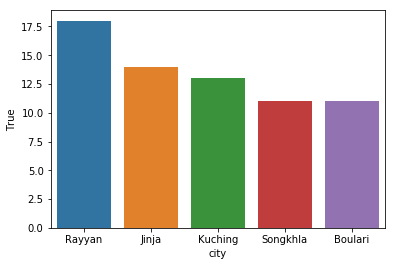

In [200]:
sns.barplot(E1['city'], E1['True'])
plt.show()

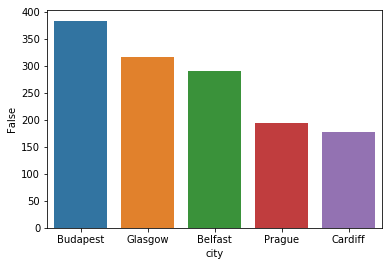

In [201]:
sns.barplot(E2['city'], E2['False'])
plt.show()

#### Score Table

In [202]:
HS=pd.DataFrame(ND.groupby('home_team')['home_score'].sum()).reset_index()

In [203]:
HS.head()

,home_team,home_score
0,Abkhazia,16
1,Afghanistan,6
2,Albania,166
3,Algeria,358
4,Andalusia,23


In [204]:
HS.rename({'home_team':'Team'}, axis=1, inplace=True)

In [205]:
HS.head()

,Team,home_score
0,Abkhazia,16
1,Afghanistan,6
2,Albania,166
3,Algeria,358
4,Andalusia,23


In [206]:
AS=pd.DataFrame(ND.groupby('away_team')['away_score'].sum()).reset_index()

In [207]:
AS.head()

,away_team,away_score
0,Abkhazia,3
1,Afghanistan,25
2,Albania,104
3,Alderney,1
4,Algeria,141


In [208]:
AS.rename({'away_team':'Team'}, axis=1, inplace=True)

In [209]:
AS.head()

,Team,away_score
0,Abkhazia,3
1,Afghanistan,25
2,Albania,104
3,Alderney,1
4,Algeria,141


In [211]:
NS=pd.DataFrame(ND1.groupby('home_team')['home_score'].sum()).reset_index()

In [212]:
NS.rename({'home_team':'Team'}, axis=1, inplace=True)

In [213]:
NS1=pd.DataFrame(ND1.groupby('away_team')['away_score'].sum()).reset_index()

In [214]:
NS1.rename({'away_team':'Team'}, axis=1, inplace=True)

In [215]:
NS=NS.merge(NS1, on='Team', how='outer')

In [216]:
NS.fillna(0, inplace=True)

In [217]:
NS['home_score']=NS['home_score'].astype(int)
NS['away_score']=NS['away_score'].astype(int)

In [218]:
NS.head()

,Team,home_score,away_score
0,Abkhazia,20,9
1,Afghanistan,43,38
2,Albania,23,1
3,Alderney,5,9
4,Algeria,150,44


In [219]:
NS['neutral_score']=NS[['home_score', 'away_score']].sum(1)

In [220]:
NS.head()

,Team,home_score,away_score,neutral_score
0,Abkhazia,20,9,29
1,Afghanistan,43,38,81
2,Albania,23,1,24
3,Alderney,5,9,14
4,Algeria,150,44,194


In [221]:
NS.drop(['home_score','away_score'], axis=1, inplace=True)

In [222]:
HS=HS.merge(AS, on='Team', how='outer')

In [223]:
HS=HS.merge(NS, on='Team', how='outer')

In [224]:
HS.fillna(0, inplace=True)

In [225]:
HS['home_score']=HS['home_score'].astype(int)
HS['away_score']=HS['away_score'].astype(int)
HS['neutral_score']=HS['neutral_score'].astype(int)

In [226]:
HS.head()

,Team,home_score,away_score,neutral_score
0,Abkhazia,16,3,29
1,Afghanistan,6,25,81
2,Albania,166,104,24
3,Algeria,358,141,194
4,Andalusia,23,2,0


In [227]:
AS=HS[['Team','home_score']].sort_values(by='home_score', ascending=False).head(5)

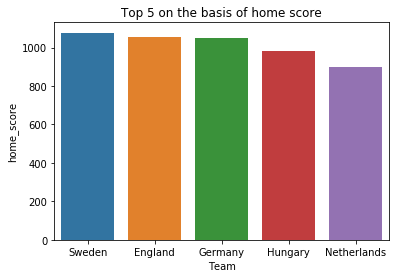

In [228]:
sns.barplot(AS['Team'], AS['home_score'])
plt.title('Top 5 on the basis of home score')
plt.show()

In [229]:
AS1=HS[['Team','away_score']].sort_values(by='away_score', ascending=False).head(5)

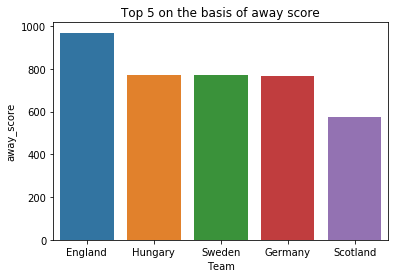

In [230]:
sns.barplot(AS1['Team'], AS1['away_score'])
plt.title('Top 5 on the basis of away score')
plt.show()

In [231]:
AS2=HS[['Team','neutral_score']].sort_values(by='neutral_score', ascending=False).head(5)

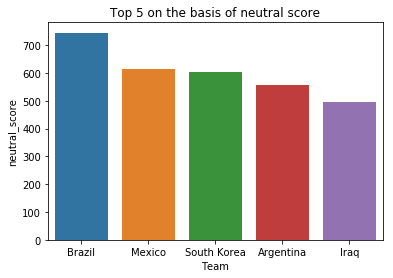

In [232]:
sns.barplot(AS2['Team'], AS2['neutral_score'])
plt.title('Top 5 on the basis of neutral score')
plt.show()

In [234]:
for i in range(0, len(HS['Team'])):
    HS.loc[i, 'Home-Away']=HS.loc[i,'home_score']-HS.loc[i, 'away_score']

In [235]:
for i in range(0, len(HS['Team'])):
    HS.loc[i, 'Home-Neutral']=HS.loc[i,'home_score']-HS.loc[i, 'neutral_score']

In [236]:
for i in range(0, len(HS['Team'])):
    HS.loc[i, 'Away-Neutral']=HS.loc[i,'away_score']-HS.loc[i, 'neutral_score']

In [237]:
HS.head()

,Team,home_score,away_score,neutral_score,Home-Away,Home-Neutral,Away-Neutral
0,Abkhazia,16,3,29,13.0,-13.0,-26.0
1,Afghanistan,6,25,81,-19.0,-75.0,-56.0
2,Albania,166,104,24,62.0,142.0,80.0
3,Algeria,358,141,194,217.0,164.0,-53.0
4,Andalusia,23,2,0,21.0,23.0,2.0


In [238]:
LL=list(HS.columns)[-3:]

In [239]:
for i in LL:
    HS[i]=HS[i].astype(int)

In [240]:
HS.head()

,Team,home_score,away_score,neutral_score,Home-Away,Home-Neutral,Away-Neutral
0,Abkhazia,16,3,29,13,-13,-26
1,Afghanistan,6,25,81,-19,-75,-56
2,Albania,166,104,24,62,142,80
3,Algeria,358,141,194,217,164,-53
4,Andalusia,23,2,0,21,23,2


In [253]:
HS.describe()

,home_score,away_score,neutral_score,Home-Away,Home-Neutral,Away-Neutral
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,174.236422,109.773163,98.782748,64.463259,75.453674,10.990415
std,222.397891,150.844789,115.532535,93.883039,182.596546,138.466729
min,0.000000,0.000000,0.000000,-73.000000,-326.000000,-358.000000
25%,9.000000,6.000000,22.000000,0.000000,-14.000000,-40.000000
50%,79.000000,57.000000,54.000000,22.000000,13.000000,-6.000000
75%,259.000000,155.000000,139.000000,102.000000,111.000000,18.000000
max,1077.000000,969.000000,745.000000,421.000000,925.000000,822.000000


In [256]:
HS.to_excel('Scores.xlsx')

In [258]:
HS=HS[(HS['home_score']>60) & (HS['away_score']>60) & (HS['neutral_score']>60)]

In [248]:
HS[HS['Home-Away']>0][['Team','home_score','away_score','Home-Away']].sort_values(by='Home-Away', ascending=False).head()

,Team,home_score,away_score,Home-Away
249,United States,657,236,421
83,France,857,471,386
118,Italy,773,393,380
207,Saudi Arabia,501,133,368
152,Mexico,624,257,367


In [262]:
HS[HS['Home-Away']<0][['Team','home_score','away_score','Home-Away']].sort_values(by='Home-Away', ascending=True).head()

,Team,home_score,away_score,Home-Away
210,Serbia,115,188,-73
170,North Korea,74,134,-60
60,Cuba,118,150,-32
185,Paraguay,298,327,-29
204,Saint Vincent and the Grenadines,72,83,-11


In [247]:
HS[HS['Home-Neutral']<0][['Team','home_score','neutral_score','Home-Neutral']].sort_values(by='Home-Neutral', ascending=True).head()

,Team,home_score,neutral_score,Home-Neutral
37,Burma,81,407,-326
113,Iraq,178,495,-317
234,Tahiti,94,377,-283
170,North Korea,74,329,-255
252,Vanuatu,58,240,-182


In [263]:
HS[HS['Home-Neutral']>0][['Team','home_score','neutral_score','Home-Neutral']].sort_values(by='Home-Neutral', ascending=False).head()

,Team,home_score,neutral_score,Home-Neutral
228,Sweden,1077,152,925
74,England,1053,147,906
108,Hungary,982,131,851
90,Germany,1050,287,763
164,Netherlands,897,161,736


In [241]:
HS[HS['Away-Neutral']<0][['Team','away_score','neutral_score','Away-Neutral']].sort_values(by='Away-Neutral', ascending=True).head()

,Team,away_score,neutral_score,Away-Neutral
152,Mexico,257,615,-358
37,Burma,84,407,-323
113,Iraq,180,495,-315
222,South Korea,307,605,-298
111,Indonesia,139,434,-295


In [264]:
HS[HS['Away-Neutral']>0][['Team','away_score','neutral_score','Away-Neutral']].sort_values(by='Away-Neutral', ascending=False).head()

,Team,away_score,neutral_score,Away-Neutral
74,England,969,147,822
108,Hungary,769,131,638
228,Sweden,769,152,617
90,Germany,767,287,480
66,Denmark,503,86,417


In [268]:
HS1=HS.sort_values(by=['home_score','away_score','neutral_score'], ascending=[False,False,False])

In [273]:
HS1.iloc[:,0:4].head()

,Team,home_score,away_score,neutral_score
228,Sweden,1077,769,152
74,England,1053,969,147
90,Germany,1050,767,287
108,Hungary,982,769,131
164,Netherlands,897,542,161
